# Jupyter Notebook 2 - Implementing The Algorithms

At this point in the class, we've seen lots of important algorithms for doing polynomial interpolation and calculus - so this assignment, the last one, is about implementing them.


There's 6 problems here, some of which build on previouis ones.  For instance, there's problems both on Richardson Extrapolation and the Romberg method; I imagine it's probably just easier to do these as two separate problems?  But you're definitely going to want to do the Newton interpolation problem and then just use it to do the following two problems.

4 complete answers gets you a grade of C, 5 complete answers gets you a B, and doing all the problems gets you an A.  

Hopefully this should be an easier assignment than Jupyter Notebook 1.  If it's taking you too much time please let me know.




## Newton interpolation

Write a function which computes, and returns, the interpolation polynomial.

Input:  
* x:  a list of x coordinates
* y: a list of y cooridantes
 
Output:
* a function f which returns values of the interpolation polynomial
 
Python lets you return functions on the fly and return them - so, for instance, here's how you might convert a list of coefficients into a polynomial function.  You probably won't want to do this *exact* thing, but you could do something similar.

In [1]:
def make_polynomial(a):
    def result(x):
        return sum(a[k] * x**k for k in range(len(a)))
    return result
   

And here's how you use it.

In [2]:
# this now makes f the polynomial x^2 + 3*x + 2
f = make_polynomial([2,3,1])
print([(t,f(t)) for t in range(10)])

In [3]:
# def divideDiff(xVals, yVals, ddNum):
#     """ 
#     calculates the values for a round of divided differences
#     """
#     dd_list = []
#     for i in range(2, len(xVals)-ddNum+2):
#         currentX = xVals[i-2]
#         currentY = yVals[i-2]
#         nextX = xVals[i+ddNum-2]
#         nextY = yVals[i-1]
#         result = (currentY-nextY)/(currentX-nextX) 
#         dd_list.append(result)
#     return dd_list

# def getDividedDiff(xVals, yVals):
#     """ 
#     calls divideDiff to get the divided difference values for each round of divided differences 
#     (fills out the divided difference "table")
#     """
#     dd_dict = {} # key is the particular round of divided difference; value is the list of divided difference values for that round
#     dd_number = 1
#     dd_dict[dd_number] = divideDiff(xVals, yVals, dd_number)
#     p_coeffs = [yVals[0]]
#     while dd_number < len(xVals)-1:
#         dd_number+=1
#         dd_dict[dd_number] = divideDiff(xVals, dd_dict[dd_number-1], dd_number)
#     for key in dd_dict:
#         p_coeffs.append(dd_dict[key][0])
#     return p_coeffs

import numpy as np

def getDividedDiff(xVals, yVals):
    """ cleaner and less complicated version of above """
    p_coeffs = np.copy(yVals)
    for j in range(1, len(xVals)):
        for i in range(len(xVals)-1, j-1, -1):
            currX = xVals[i-j]
            currY = p_coeffs[i-1]
            nextX = xVals[i]
            nextY = p_coeffs[i]
            p_coeffs[i] = (nextY-currY)/(nextX-currX)
    return p_coeffs          

def interpolatePoly(xVals, yVals):   
    def result(t):
        """ calculates the polynomial and values of the polynomial in range t"""
        p_coeffs = getDividedDiff(xVals,yVals)
        p = p_coeffs[len(xVals)-1]
        for i in range(len(xVals)-2,-1,-1):
            p = p*(t-xVals[i]) + p_coeffs[i]
        return p
    return result

In [4]:
xVals = [1, 2, 3]
yVals = [2, 4, 6]
p = interpolatePoly(xVals, yVals)
print([(t, p(t)) for t in range(10)])


## Take that, third grade math

Using your Newton interpolation code (or some other method), write a function which guesses the next few numbers in a sequence of numbers using polynomial interpolation.  For instance, if you say

guess(1,4,9,16)

it should notice that you've given it the sequence of squares, and return

[1,4,9,16,25,36,49]

To make a python function that takes a variable number of arguments, use a star in the arguments definition, like this:

In [5]:
def sum_plus_ten(*L):
    return sum(L)+10

sum_plus_ten(1,2,3,4,5,6,7)

In [6]:
def guess(*L):
    """ 
    uses polynomial interpretation to guess the next few numbers from a given sequence
    (i will be assuming that each sequence of numbers starts at x=1, as i am otherwise 
    not sure how to provide x values to my function to create an interpolation polynomial)
    """
    xVals = []
    yVals = []
    for i in range(1, len(L)+1):
        xVals.append(i)
        yVals.append(L[i-1])
    p = interpolatePoly(xVals, yVals)      
    return [p(t) for t in range(10)]

print(guess(1,4,9,16))
print(guess(2,4,6,8))

## Runge Function

Using your polynomial interpolation code above, plot graphs of the Runge function 

$$f(x) = \frac{1}{1+x^2}$$

on the interval [-5, 5], as well as its interpolation polynomials with equally spaced points.  Se if you can duplicate Figure 4.7 on Page 155 of the text.  Also show the errors getting worse with more points.


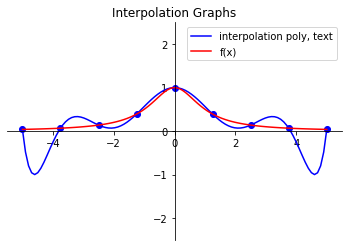

In [7]:
""" trying to duplicate picture from text """
import matplotlib.pyplot as plt 
import numpy as np

xpt = np.array([-5, -3.75, -2.5, -1.25, 0, 1.25, 2.5, 3.75, 5])
ypt = np.array([1/(1+x**2) for x in xpt])

#f(x)
x = np.linspace(-5, 5, 100)
y = 1/(1+x**2)

#Calculates graphs interpolating polynomial
p = interpolatePoly(xpt, ypt)
tval = np.linspace(-5, 5, 100)
yval = p(tval)

#Setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#Plotting
#trying to match the picture on p.155
plt.plot(tval,yval, 'b', label = 'interpolation poly, text')
plt.plot(xpt,ypt,color='b',marker='o', linestyle='') # the equally spaced points
#f(x)
plt.plot(x,y, 'r', label = 'f(x)')

plt.legend()
plt.title('Interpolation Graphs')
plt.ylim([-2.5,2.5])
plt.show()


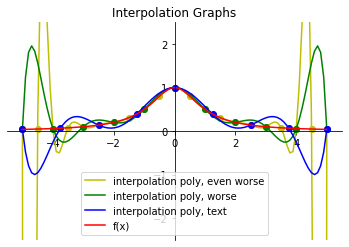

In [8]:
""" making things look worse with more points """
import matplotlib.pyplot as plt 
import numpy as np

xpt1 = np.array([-5, -3.75, -2.5, -1.25, 0, 1.25, 2.5, 3.75, 5])
ypt1 = np.array([1/(1+x**2) for x in xpt1])

xpt2 = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ypt2 = np.array([1/(1+x**2) for x in xpt2])

xpt3 = np.array([-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
ypt3 = np.array([1/(1+x**2) for x in xpt3])


#Calculates graphs interpolating polynomial
p1 = interpolatePoly(xpt1, ypt1)
tval = np.linspace(-5, 5, 100)
yval1 = p1(tval)

p2 = interpolatePoly(xpt2, ypt2)
tval = np.linspace(-5, 5, 100)
yval2 = p2(tval)

p3 = interpolatePoly(xpt3, ypt3)
tval = np.linspace(-5, 5, 100)
yval3 = p3(tval)

#Setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#Plotting
#displaying how much worse it gets with more points, 21 points
plt.plot(tval,yval3, 'y', label = 'interpolation poly, even worse')
plt.plot(xpt3,ypt3,color='y',marker='o', linestyle='') # the equally spaced points

#displaying how much worse it gets with more points, 11 points
plt.plot(tval,yval2, 'g', label = 'interpolation poly, worse')
plt.plot(xpt2,ypt2,color='g',marker='o', linestyle='') # the equally spaced points

#9 points
plt.plot(tval,yval1, 'b', label = 'interpolation poly, text')
plt.plot(xpt1,ypt1,color='b',marker='o', linestyle='') # the equally spaced points

#f(x)
plt.plot(x,y, 'r', label = 'f(x)')

plt.legend()
plt.title('Interpolation Graphs')
plt.ylim([-2.5,2.5])
plt.show()


## Richardson Extrapolation



Implement the Richardson Extrapolation algorithm for computing the derivative of $\tan x$ numerically - and check it against the known formula $\frac{d}{dx} \tan x = \sec^2 x$.

In [9]:
import numpy as np
def rich_extrapolation(f, x, h, n):
    """
    f = function
    x = a specific point
    h = a value of h
    n = number of rows to be computed in array
    Based on pseudocode from pg. 170 of text.
    """
    rows, cols = (n, n) 
    d = [[0 for i in range(cols)] for j in range(rows)] 
    for i in range(0, n):
        d[i][0] = (f(x+h) - f(x-h))/(2*h)
        for j in range(1, i):
            d[i][j] = d[i][j-1] + (d[i][j-1] - d[i-1][j-1])/((4**j)-1)
        h = h/2
    return d

def f(x):
    """ function for the question"""
    return np.tan(x)

x0 = np.pi/6
arr = rich_extrapolation(f, x0, 1, 10)
# for row in arr: 
#     print(row) 
   
print(f"Richardson extrapolated value: {arr[9][8]}")
print(f"True value of derivative: {1/(np.cos(x0)**2)}")   


#example function from text
# def f(x):
#     """ function for the question"""
#     return np.sin(x)
# arr = rich_extrapolation(f, 1.2309594154, 1, 10)
# for row in arr: 
#     print(row)  
# print(f"True value of derivative: {np.cos(1.2309594154)}")   

Richardson extrapolated value: 1.3333333333333257
True value of derivative: 1.333333333333333


## Recursive trapezoid rule

Implement the recursive trapezoid rule as described in Section 5.2 of the text, and use it to numerically integrate $f(x) = \frac{1}{x^2}$ from $x=1$ to $x=2$, with 16 intervals.  Compare with the true value of the integral.


In [10]:
def trapezoid(f, a, b, n):
    """
    f = function
    a = lower bound
    b = upper bound
    n = number of trapezoids or intervals
    Based on pseudocode from pg. 191 of text.
    """
    h = (b-a)/n
    ans = 0.5*(f(a)+f(b))
    for i in range(1, n-1):
        x = a + i*h
        ans += f(x)
    return ans * h

def rec_trapezoid(f, a, b, n):
    rows, cols = (n, n) 
    r = [[0 for i in range(cols)] for j in range(rows)] 
    h = (b-a)/(2**n)
    r[0][0] = (h/2)*(f(a)+f(b))
    for i in range(1, n):
        ans = 0
        for k in range(1, (2**i)-1):
            ans += f(a + (k*h))
        r[i][0] = 0.5*(r[i-1][0])+(ans*h)
    return r

def f(x):
    """ function for the question"""
    return 1/(x**2)

print(f"Trapezoid rule value of f(x) from x=1 to 2, with 16 intervals: {trapezoid(f, 1, 2, 16)}")
rec = rec_trapezoid(f, 1, 2, 16)
print(f"Recursive trapezoid rule value of f(x) from x=1 to 2, with 16 intervals: {rec[15][0]}")
print(f"True value of integral of f(x) from x=1 to 2: 0.5") #calculated on the side

Trapezoid rule value of f(x) from x=1 to 2, with 16 intervals: 0.4839198465057685
Recursive trapezoid rule value of f(x) from x=1 to 2, with 16 intervals: 0.47095788302231306
True value of integral of f(x) from x=1 to 2: 0.5


## Romberg Algorithm

Building on your work above, implement the Romberg algorithm and compute $R(4,4)$ for the same function $f(x)$.  Print out the entire table $R(m,n)$ used to do the computation.

In [25]:
import numpy as np
def romberg(f, a, b, n):
    """ 
    f = function
    a = lower bound
    b = upper bound
    n = number of intervals
    Based on the pseudocode from pg. 206
    """
    rows, cols = (n, n) 
    r = [[0 for i in range(cols)] for j in range(rows)] 
    h = b-a
    r[0][0] = (h/2)*(f(a)+f(b))
    for i in range(1, n):
        h = h/2
        ans = 0
        for k in range(1, (2**i)-1, 2):
            ans += f(a + (k*h))
        r[i][0] = 0.5*(r[i-1][0])+(ans*h)
        for j in range(1, i):
            r[i][j] = r[i][j-1] + (r[i][j-1] - r[i-1][j-1])/((4**j)-1)
    return r

def f(x):
    """ function for the question"""
    return 1/(x**2)

arr = romberg(f, 1, 2, 8)
print(arr[4][3]) # not sure what R(4, 4) really is based from this function since arr[4][4] = 0, but I think it is arr[4][3]
print(arr[3][2]) # or maybe something to do with arrays starting at 0?
print(arr[7][3]) # or maybe it has to do with n?? 
print("")
for row in arr: 
    print(row) 


0.4375517644970929
0.39309952026256084
0.4886071890445087

[0.625, 0, 0, 0, 0, 0, 0, 0]
[0.3125, 0, 0, 0, 0, 0, 0, 0]
[0.31625000000000003, 0.31750000000000006, 0, 0, 0, 0, 0, 0]
[0.3703434126846131, 0.3883745502461508, 0.39309952026256084, 0, 0, 0, 0, 0]
[0.4179561276849068, 0.4338270326850047, 0.43685719818092833, 0.4375517644970929, 0, 0, 0, 0]
[0.4507733791168159, 0.46171246292745227, 0.4635714916102821, 0.46399552801392263, 0.464099229047322, 0, 0, 0]
[0.4713830912437377, 0.4782529952860449, 0.47935569744328443, 0.47960624039301464, 0.47966745887293266, 0.4796826770839059, 0, 0]
[0.48371417183951126, 0.48782453203810244, 0.4884626344882396, 0.4886071890445087, 0.48864248688235773, 0.4886512601257687, 0.48865345025593765, 0]
